In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay

In [9]:
df['Gender'].replace({"Male":0,"Female":1},inplace=True)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [10]:
df.columns


Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [11]:
x=df[['User ID','Gender','Age','EstimatedSalary']]
y=df[['Purchased']]

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=29)

In [16]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [32]:
ypred=model.predict(xtest)
ypred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [19]:
model.score(xtrain,ytrain)

0.7833333333333333

In [20]:
model.score(x,y)

0.785

In [22]:
cm=confusion_matrix(ytest,ypred)
cm

array([[64,  5],
       [16, 15]])

In [23]:
tn,fp,fn,tp=confusion_matrix(ytest,ypred).ravel()
print(tn,fp,fn,tp)

64 5 16 15


In [24]:
a=accuracy_score(ytest,ypred)
a


0.79

In [31]:
error=1-a
error

0.20999999999999996

In [26]:
precision_score(ytest,ypred)

0.75

In [27]:
recall_score(ytest,ypred)

0.4838709677419355

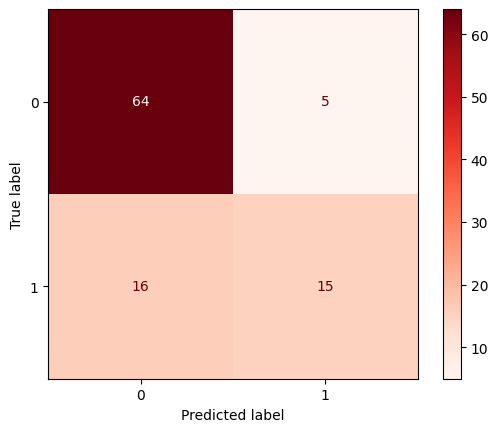

In [30]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
conf_matrix.plot(cmap=plt.cm.Reds)
plt.show()